# Projeto Covid - Situação Brasil
## Por: Michel Souza Santana
> Data: 21/01/2023

> Agora, com todos os dados relevantes em mãos farei uma análise para verificar se houve influência da vacina no controle e redução dos casos e motes dos estados mais afetados.
> Depois vou verificar se os estados menos afetados teve esse resultado pelo indice de vacinação aplicada.

### Análise dos dados
* Casos X Mortes X Vacinação

> Importando bibliotecas python

In [778]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> carregando os arquivos csv

In [779]:
df_est = pd.read_csv('csv/estados.csv')
df_est.drop(columns=['Unnamed: 0'], inplace=True)
df_est = df_est.sort_values(by=['local'], ascending=True)
df_est.head()

,local,total_casos,a_cada_milhao,total_mortes,populacao,letalidade %,mortalidade %
0,Acre,160106,202640,2041,776463,1.27,0.26
1,Alagoas,336780,101387,7230,3300938,2.15,0.22
2,Amapá,183666,244562,2167,734995,1.18,0.29
3,Amazonas,625260,161410,14421,3807923,2.31,0.38
4,Bahia,1783192,117881,31349,15044127,1.76,0.21


In [780]:
df_vac = pd.read_csv('csv/vacinacao.csv')
df_vac.drop(columns=['Unnamed: 0'], inplace=True)
df_vac = df_vac.sort_values(by=['estado'], ascending=True)
df_vac.head()

,estado,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
24,Acre,597935,65.05,284813,30.99,696619,75.79,1280931
19,Alagoas,2355718,69.73,1272731,37.67,2642076,78.21,4941707
25,Amapá,514824,57.63,269240,30.14,614022,68.74,1111564
14,Amazonas,2922899,67.48,1691944,39.06,3361647,77.61,6209127
3,Bahia,11226993,74.66,7710188,51.28,11717323,77.93,22679938


In [781]:
df_vac

,estado,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
24,Acre,597935,65.05,284813,30.99,696619,75.79,1280931
19,Alagoas,2355718,69.73,1272731,37.67,2642076,78.21,4941707
25,Amapá,514824,57.63,269240,30.14,614022,68.74,1111564
14,Amazonas,2922899,67.48,1691944,39.06,3361647,77.61,6209127
3,Bahia,11226993,74.66,7710188,51.28,11717323,77.93,22679938
7,Ceará,8076454,86.91,5391468,58.02,8294079,89.25,16087812
18,Distrito Federal,2480046,79.23,1527089,48.79,2566016,81.98,4984915
13,Espírito Santo,3227524,77.74,1957707,47.15,3469351,83.56,6585652
10,Goiás,5342715,73.19,3001131,41.11,5920789,81.11,11263504
11,Maranhão,4903627,68.19,2190968,30.47,5797633,80.62,10570892


In [782]:
df = df_est.set_index('local').join(df_vac.set_index('estado'))
df = df.reset_index()
df

,local,total_casos,a_cada_milhao,total_mortes,populacao,letalidade %,mortalidade %,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
0,Acre,160106,202640,2041,776463,1.27,0.26,597935,65.05,284813,30.99,696619,75.79,1280931
1,Alagoas,336780,101387,7230,3300938,2.15,0.22,2355718,69.73,1272731,37.67,2642076,78.21,4941707
2,Amapá,183666,244562,2167,734995,1.18,0.29,514824,57.63,269240,30.14,614022,68.74,1111564
3,Amazonas,625260,161410,14421,3807923,2.31,0.38,2922899,67.48,1691944,39.06,3361647,77.61,6209127
4,Bahia,1783192,117881,31349,15044127,1.76,0.21,11226993,74.66,7710188,51.28,11717323,77.93,22679938
5,Ceará,1446481,163577,28091,8778575,1.94,0.32,8076454,86.91,5391468,58.02,8294079,89.25,16087812
6,Distrito Federal,893250,194373,11838,2789761,1.33,0.42,2480046,79.23,1527089,48.79,2566016,81.98,4984915
7,Espírito Santo,1317879,339218,15001,3839363,1.14,0.39,3227524,77.74,1957707,47.15,3469351,83.56,6585652
8,Goiás,1862817,285567,27885,6434052,1.50,0.43,5342715,73.19,3001131,41.11,5920789,81.11,11263504
9,Maranhão,491004,71670,11043,6794298,2.25,0.16,4903627,68.19,2190968,30.47,5797633,80.62,10570892


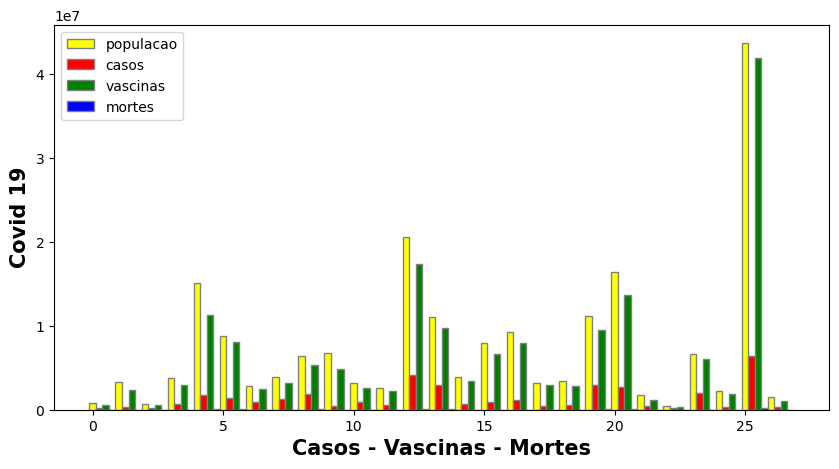

In [783]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(10, 5))
 
# set height of bar
populacao = df['populacao']
casos = df['total_casos']
vascinas = df['2ª dose']
mortes = df['total_mortes']
 
# Set poscasosion of bar on X axis
br1 = np.arange(len(populacao))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, populacao, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='populacao')
plt.bar(br2, casos, color ='r', width = barWidth,
        edgecolor ='grey', label ='casos')
plt.bar(br3, vascinas, color ='g', width = barWidth,
        edgecolor ='grey', label ='vascinas')
plt.bar(br4, mortes, color ='b', width = barWidth,
        edgecolor ='grey', label ='mortes')
 
# Adding Xticks
plt.xlabel('Casos - Vascinas - Mortes', fontweight ='bold', fontsize = 15)
plt.ylabel('Covid 19', fontweight ='bold', fontsize = 15)
#plt.xticks([r + barWidth for r in range(len(casos))],
#        ['2015', '2016', '2017', '2018', '2019'])
 
plt.legend()
plt.show()

In [784]:
df.head()

,local,total_casos,a_cada_milhao,total_mortes,populacao,letalidade %,mortalidade %,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
0,Acre,160106,202640,2041,776463,1.27,0.26,597935,65.05,284813,30.99,696619,75.79,1280931
1,Alagoas,336780,101387,7230,3300938,2.15,0.22,2355718,69.73,1272731,37.67,2642076,78.21,4941707
2,Amapá,183666,244562,2167,734995,1.18,0.29,514824,57.63,269240,30.14,614022,68.74,1111564
3,Amazonas,625260,161410,14421,3807923,2.31,0.38,2922899,67.48,1691944,39.06,3361647,77.61,6209127
4,Bahia,1783192,117881,31349,15044127,1.76,0.21,11226993,74.66,7710188,51.28,11717323,77.93,22679938


In [785]:
casos = df.sort_values(by=['total_casos'], ascending=False).head(10)
casos

,local,total_casos,a_cada_milhao,total_mortes,populacao,letalidade %,mortalidade %,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
25,São Paulo,6389460,145099,178178,43663672,2.79,0.41,41923014,89.20,28631980,60.92,43105900,91.72,83742803
12,Minas Gerais,4122029,197518,64799,20593366,1.57,0.31,17330069,80.51,11782249,54.73,18312594,85.07,35642663
19,Rio Grande do Sul,2940791,260558,41716,11164050,1.42,0.37,9472602,82.31,6085003,52.88,9849826,85.59,18959629
13,Paraná,2903031,261966,45919,10997462,1.58,0.42,9778886,83.75,6831798,58.51,10224412,87.57,19663680
20,Rio de Janeiro,2719059,165180,76636,16369178,2.82,0.47,13683291,77.94,8518921,48.52,14603299,83.18,27884034
23,Santa Catarina,1971482,275163,22615,6634250,1.15,0.34,6051146,81.52,3206726,43.20,6358381,85.66,12151670
8,Goiás,1862817,285567,27885,6434052,1.50,0.43,5342715,73.19,3001131,41.11,5920789,81.11,11263504
4,Bahia,1783192,117881,31349,15044127,1.76,0.21,11226993,74.66,7710188,51.28,11717323,77.93,22679938
5,Ceará,1446481,163577,28091,8778575,1.94,0.32,8076454,86.91,5391468,58.02,8294079,89.25,16087812
7,Espírito Santo,1317879,339218,15001,3839363,1.14,0.39,3227524,77.74,1957707,47.15,3469351,83.56,6585652


In [786]:
casos_ind = casos['local']

In [787]:
dose2 = df.sort_values(by=['2ª dose'], ascending=False).head(10)
dose2

,local,total_casos,a_cada_milhao,total_mortes,populacao,letalidade %,mortalidade %,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
25,São Paulo,6389460,145099,178178,43663672,2.79,0.41,41923014,89.20,28631980,60.92,43105900,91.72,83742803
12,Minas Gerais,4122029,197518,64799,20593366,1.57,0.31,17330069,80.51,11782249,54.73,18312594,85.07,35642663
20,Rio de Janeiro,2719059,165180,76636,16369178,2.82,0.47,13683291,77.94,8518921,48.52,14603299,83.18,27884034
4,Bahia,1783192,117881,31349,15044127,1.76,0.21,11226993,74.66,7710188,51.28,11717323,77.93,22679938
13,Paraná,2903031,261966,45919,10997462,1.58,0.42,9778886,83.75,6831798,58.51,10224412,87.57,19663680
19,Rio Grande do Sul,2940791,260558,41716,11164050,1.42,0.37,9472602,82.31,6085003,52.88,9849826,85.59,18959629
5,Ceará,1446481,163577,28091,8778575,1.94,0.32,8076454,86.91,5391468,58.02,8294079,89.25,16087812
16,Pernambuco,1138859,122752,22620,9208551,1.99,0.25,7991191,82.11,4519829,46.44,8528534,87.64,16377597
15,Pará,864379,107058,18996,7969655,2.20,0.24,6636878,74.89,2492989,28.13,6869551,77.52,13506429
23,Santa Catarina,1971482,275163,22615,6634250,1.15,0.34,6051146,81.52,3206726,43.20,6358381,85.66,12151670


In [788]:
dose2_ind = dose2['local']

In [789]:
mortes = df.sort_values(by=['total_mortes'], ascending=False).head(10)
mortes

,local,total_casos,a_cada_milhao,total_mortes,populacao,letalidade %,mortalidade %,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
25,São Paulo,6389460,145099,178178,43663672,2.79,0.41,41923014,89.20,28631980,60.92,43105900,91.72,83742803
20,Rio de Janeiro,2719059,165180,76636,16369178,2.82,0.47,13683291,77.94,8518921,48.52,14603299,83.18,27884034
12,Minas Gerais,4122029,197518,64799,20593366,1.57,0.31,17330069,80.51,11782249,54.73,18312594,85.07,35642663
13,Paraná,2903031,261966,45919,10997462,1.58,0.42,9778886,83.75,6831798,58.51,10224412,87.57,19663680
19,Rio Grande do Sul,2940791,260558,41716,11164050,1.42,0.37,9472602,82.31,6085003,52.88,9849826,85.59,18959629
4,Bahia,1783192,117881,31349,15044127,1.76,0.21,11226993,74.66,7710188,51.28,11717323,77.93,22679938
5,Ceará,1446481,163577,28091,8778575,1.94,0.32,8076454,86.91,5391468,58.02,8294079,89.25,16087812
8,Goiás,1862817,285567,27885,6434052,1.50,0.43,5342715,73.19,3001131,41.11,5920789,81.11,11263504
16,Pernambuco,1138859,122752,22620,9208551,1.99,0.25,7991191,82.11,4519829,46.44,8528534,87.64,16377597
23,Santa Catarina,1971482,275163,22615,6634250,1.15,0.34,6051146,81.52,3206726,43.20,6358381,85.66,12151670


In [790]:
mortes_ind = mortes['local']

In [791]:
df = casos.merge(dose2, left_on='local', right_on='local', suffixes=('', '_'))
df

,local,total_casos,a_cada_milhao,total_mortes,populacao,letalidade %,mortalidade %,2ª dose,2ª dose %,reforco,...,populacao_,letalidade %_,mortalidade %_,2ª dose_,2ª dose %_,reforco_,reforco %_,1ª dose_,1ª dose %_,total vascinas_
0,São Paulo,6389460,145099,178178,43663672,2.79,0.41,41923014,89.20,28631980,...,43663672,2.79,0.41,41923014,89.20,28631980,60.92,43105900,91.72,83742803
1,Minas Gerais,4122029,197518,64799,20593366,1.57,0.31,17330069,80.51,11782249,...,20593366,1.57,0.31,17330069,80.51,11782249,54.73,18312594,85.07,35642663
2,Rio Grande do Sul,2940791,260558,41716,11164050,1.42,0.37,9472602,82.31,6085003,...,11164050,1.42,0.37,9472602,82.31,6085003,52.88,9849826,85.59,18959629
3,Paraná,2903031,261966,45919,10997462,1.58,0.42,9778886,83.75,6831798,...,10997462,1.58,0.42,9778886,83.75,6831798,58.51,10224412,87.57,19663680
4,Rio de Janeiro,2719059,165180,76636,16369178,2.82,0.47,13683291,77.94,8518921,...,16369178,2.82,0.47,13683291,77.94,8518921,48.52,14603299,83.18,27884034
5,Santa Catarina,1971482,275163,22615,6634250,1.15,0.34,6051146,81.52,3206726,...,6634250,1.15,0.34,6051146,81.52,3206726,43.20,6358381,85.66,12151670
6,Bahia,1783192,117881,31349,15044127,1.76,0.21,11226993,74.66,7710188,...,15044127,1.76,0.21,11226993,74.66,7710188,51.28,11717323,77.93,22679938
7,Ceará,1446481,163577,28091,8778575,1.94,0.32,8076454,86.91,5391468,...,8778575,1.94,0.32,8076454,86.91,5391468,58.02,8294079,89.25,16087812


In [792]:
df.drop(columns=['total_casos_', 'a_cada_milhao_', 'total_mortes_', 'populacao_', 'letalidade %_',	'mortalidade %_', '2ª dose_', '2ª dose %_',	'reforco_', 'reforco %_', '1ª dose_', '1ª dose %_', 'total vascinas_'], inplace=True)
df

,local,total_casos,a_cada_milhao,total_mortes,populacao,letalidade %,mortalidade %,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
0,São Paulo,6389460,145099,178178,43663672,2.79,0.41,41923014,89.20,28631980,60.92,43105900,91.72,83742803
1,Minas Gerais,4122029,197518,64799,20593366,1.57,0.31,17330069,80.51,11782249,54.73,18312594,85.07,35642663
2,Rio Grande do Sul,2940791,260558,41716,11164050,1.42,0.37,9472602,82.31,6085003,52.88,9849826,85.59,18959629
3,Paraná,2903031,261966,45919,10997462,1.58,0.42,9778886,83.75,6831798,58.51,10224412,87.57,19663680
4,Rio de Janeiro,2719059,165180,76636,16369178,2.82,0.47,13683291,77.94,8518921,48.52,14603299,83.18,27884034
5,Santa Catarina,1971482,275163,22615,6634250,1.15,0.34,6051146,81.52,3206726,43.20,6358381,85.66,12151670
6,Bahia,1783192,117881,31349,15044127,1.76,0.21,11226993,74.66,7710188,51.28,11717323,77.93,22679938
7,Ceará,1446481,163577,28091,8778575,1.94,0.32,8076454,86.91,5391468,58.02,8294079,89.25,16087812


In [793]:
df = df.merge(mortes, left_on='local', right_on='local', suffixes=('', '_'))
df

,local,total_casos,a_cada_milhao,total_mortes,populacao,letalidade %,mortalidade %,2ª dose,2ª dose %,reforco,...,populacao_,letalidade %_,mortalidade %_,2ª dose_,2ª dose %_,reforco_,reforco %_,1ª dose_,1ª dose %_,total vascinas_
0,São Paulo,6389460,145099,178178,43663672,2.79,0.41,41923014,89.20,28631980,...,43663672,2.79,0.41,41923014,89.20,28631980,60.92,43105900,91.72,83742803
1,Minas Gerais,4122029,197518,64799,20593366,1.57,0.31,17330069,80.51,11782249,...,20593366,1.57,0.31,17330069,80.51,11782249,54.73,18312594,85.07,35642663
2,Rio Grande do Sul,2940791,260558,41716,11164050,1.42,0.37,9472602,82.31,6085003,...,11164050,1.42,0.37,9472602,82.31,6085003,52.88,9849826,85.59,18959629
3,Paraná,2903031,261966,45919,10997462,1.58,0.42,9778886,83.75,6831798,...,10997462,1.58,0.42,9778886,83.75,6831798,58.51,10224412,87.57,19663680
4,Rio de Janeiro,2719059,165180,76636,16369178,2.82,0.47,13683291,77.94,8518921,...,16369178,2.82,0.47,13683291,77.94,8518921,48.52,14603299,83.18,27884034
5,Santa Catarina,1971482,275163,22615,6634250,1.15,0.34,6051146,81.52,3206726,...,6634250,1.15,0.34,6051146,81.52,3206726,43.20,6358381,85.66,12151670
6,Bahia,1783192,117881,31349,15044127,1.76,0.21,11226993,74.66,7710188,...,15044127,1.76,0.21,11226993,74.66,7710188,51.28,11717323,77.93,22679938
7,Ceará,1446481,163577,28091,8778575,1.94,0.32,8076454,86.91,5391468,...,8778575,1.94,0.32,8076454,86.91,5391468,58.02,8294079,89.25,16087812


In [794]:
df.drop(columns=['total_casos_', 'a_cada_milhao_', 'total_mortes_', 'populacao_', 'letalidade %_',	'mortalidade %_', '2ª dose_', '2ª dose %_',	'reforco_', 'reforco %_', '1ª dose_', '1ª dose %_', 'total vascinas_'], inplace=True)
df

,local,total_casos,a_cada_milhao,total_mortes,populacao,letalidade %,mortalidade %,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
0,São Paulo,6389460,145099,178178,43663672,2.79,0.41,41923014,89.20,28631980,60.92,43105900,91.72,83742803
1,Minas Gerais,4122029,197518,64799,20593366,1.57,0.31,17330069,80.51,11782249,54.73,18312594,85.07,35642663
2,Rio Grande do Sul,2940791,260558,41716,11164050,1.42,0.37,9472602,82.31,6085003,52.88,9849826,85.59,18959629
3,Paraná,2903031,261966,45919,10997462,1.58,0.42,9778886,83.75,6831798,58.51,10224412,87.57,19663680
4,Rio de Janeiro,2719059,165180,76636,16369178,2.82,0.47,13683291,77.94,8518921,48.52,14603299,83.18,27884034
5,Santa Catarina,1971482,275163,22615,6634250,1.15,0.34,6051146,81.52,3206726,43.20,6358381,85.66,12151670
6,Bahia,1783192,117881,31349,15044127,1.76,0.21,11226993,74.66,7710188,51.28,11717323,77.93,22679938
7,Ceará,1446481,163577,28091,8778575,1.94,0.32,8076454,86.91,5391468,58.02,8294079,89.25,16087812
